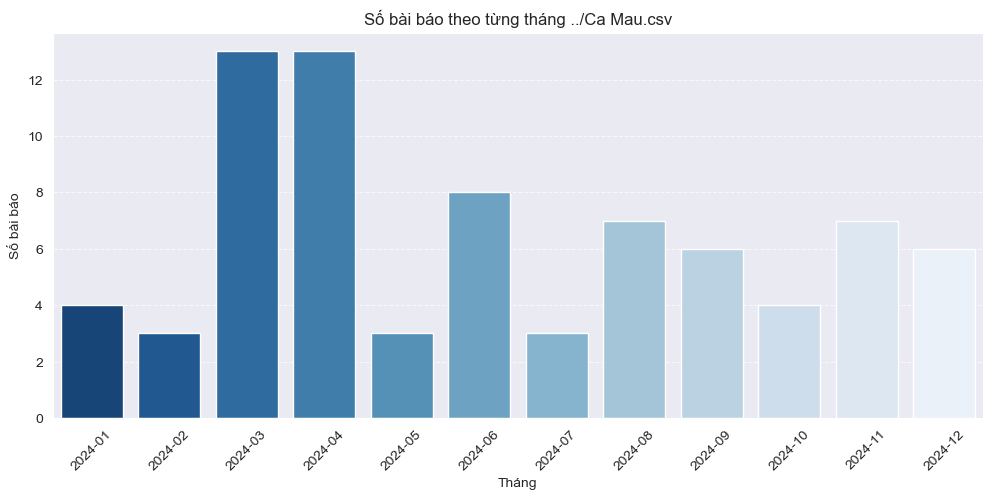

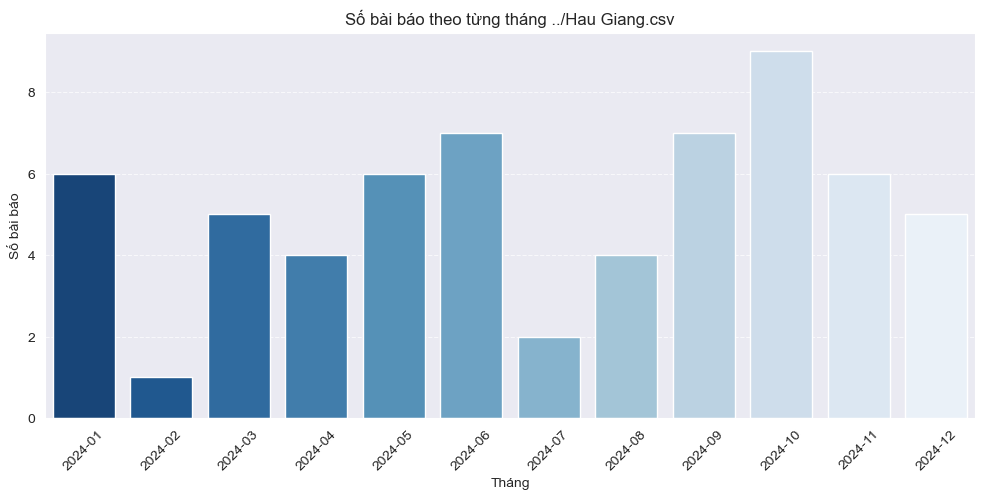

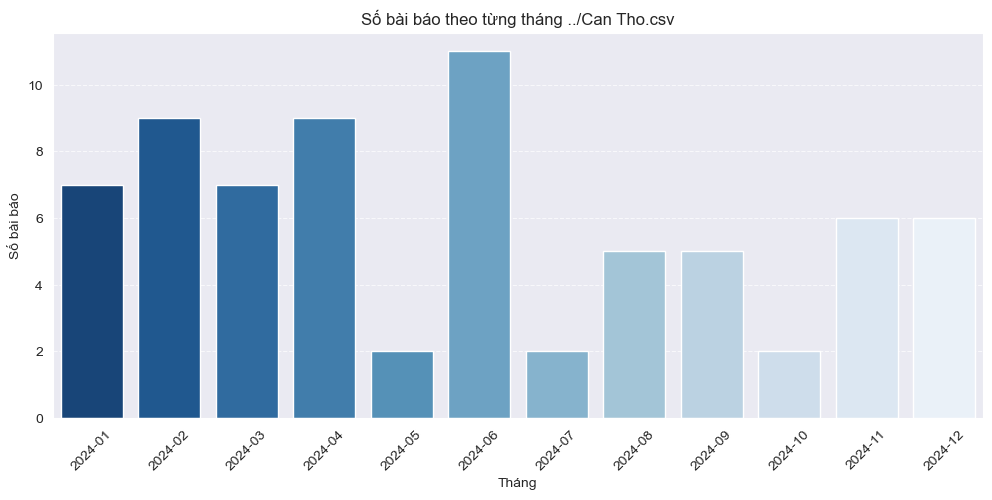

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import pandas as pd
list = ['../Ca Mau.csv', '../Hau Giang.csv', '../Can Tho.csv']
for path in list:
    df = pd.read_csv(path)
    # Chuyển đổi cột Date sang định dạng datetime (hỗ trợ nhiều định dạng khác nhau)
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    
    # Thống kê số bài báo theo từng tháng
    df["Year-Month"] = df["Date"].dt.to_period("M")
    articles_per_month = df["Year-Month"].value_counts().sort_index()
    
    # Vẽ biểu đồ số bài báo theo tháng
    plt.figure(figsize=(12, 5))
    sns.barplot(x=articles_per_month.index.astype(str), y=articles_per_month.values, palette="Blues_r")
    plt.xticks(rotation=45)
    plt.xlabel("Tháng")
    plt.ylabel("Số bài báo")
    plt.title(f"Số bài báo theo từng tháng {path}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


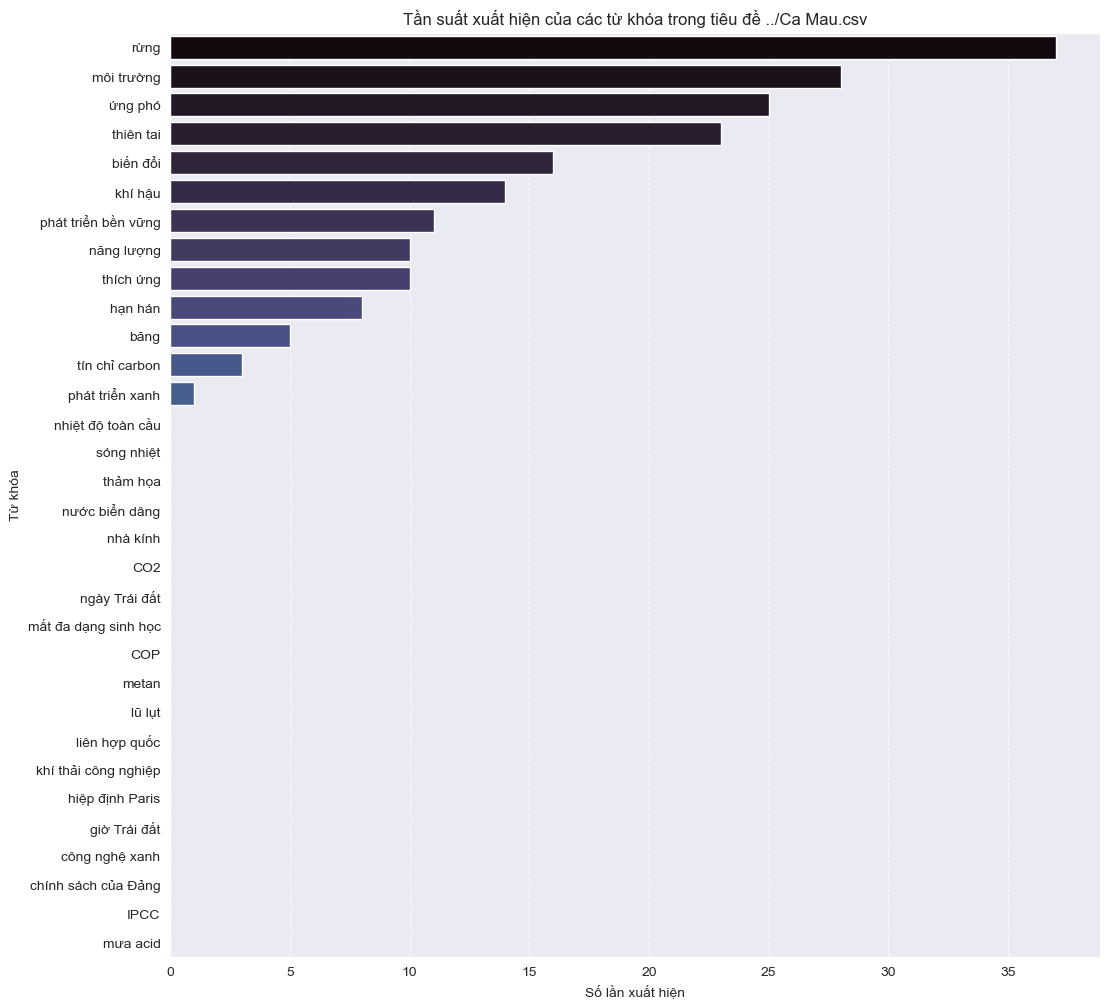

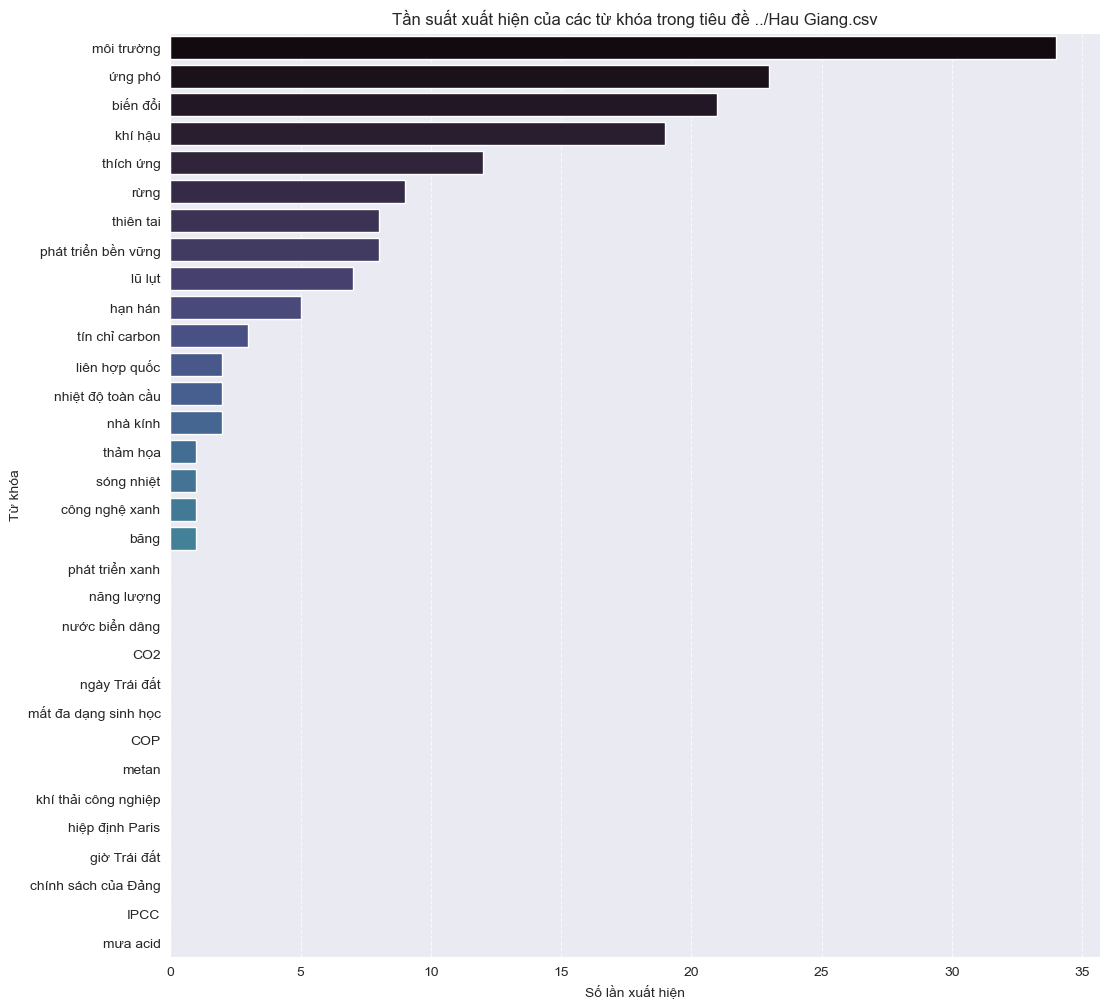

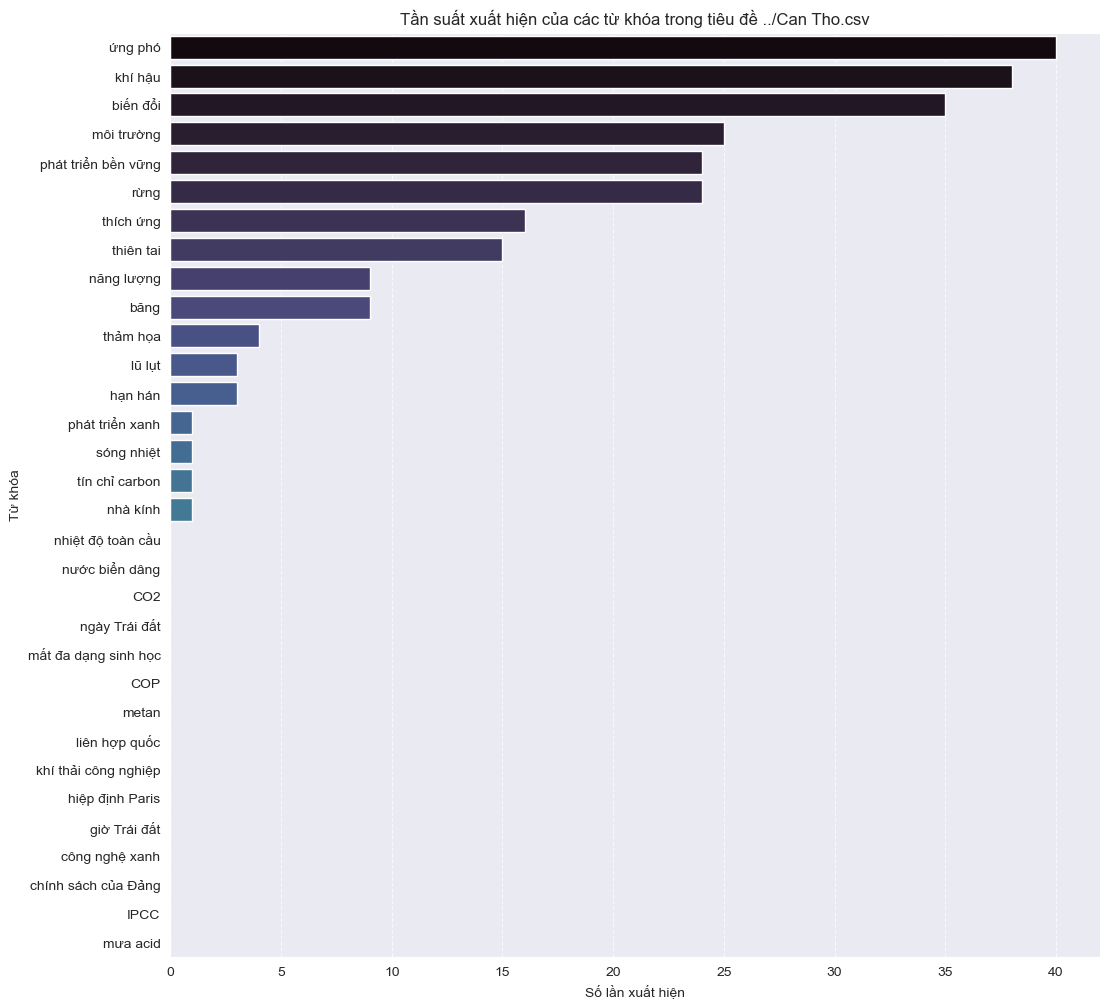

In [14]:
# Nạp lại thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc lại file CSV
list = ['../Ca Mau.csv', '../Hau Giang.csv', '../Can Tho.csv']
for path in list:
    df = pd.read_csv(path)
    
    # Chuyển đổi cột Date sang định dạng datetime
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors='coerce')
    
    # Danh sách từ khóa cần phân tích
    QUERY_LIST = [
       'CO2', 'COP', 'IPCC', 'biến đổi', 'băng', 'chính sách của Đảng',
     'công nghệ xanh', 'giờ Trái đất', 'hiệp định Paris', 'hạn hán', 'khí hậu',
     'khí thải công nghiệp', 'liên hợp quốc', 'lũ lụt', 'metan', 'môi trường',
     'mưa acid', 'mất đa dạng sinh học', 'ngày Trái đất', 'nhiệt độ toàn cầu',
     'nhà kính', 'năng lượng', 'nước biển dâng', 'phát triển bền vững',
     'phát triển xanh', 'rừng', 'sóng nhiệt', 'thiên tai', 'thích ứng', 'thảm họa',
     'tín chỉ carbon', 'ứng phó'
    ]
    
    # Đếm số lần xuất hiện của từng từ khóa trong tiêu đề
    keyword_counts = {keyword: sum(1 for title in df["Title"] if keyword in title.lower()) for keyword in QUERY_LIST}
    
    # Chuyển dữ liệu sang DataFrame để vẽ biểu đồ
    keyword_df = pd.DataFrame(keyword_counts.items(), columns=["Keyword", "Count"]).sort_values(by="Count", ascending=False)
    
    # Lấy 20 từ khóa xuất hiện nhiều nhất
    top_keywords = keyword_df.head(90)
    
    # Vẽ biểu đồ tần suất từ khóa
    plt.figure(figsize=(12, 12))
    sns.barplot(y=top_keywords["Keyword"], x=top_keywords["Count"], palette="mako")
    plt.xlabel("Số lần xuất hiện")
    plt.ylabel("Từ khóa")
    plt.title(f"Tần suất xuất hiện của các từ khóa trong tiêu đề {path}")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()
